# WeatherPy
----

### Data Analysis and Observations Summary

1. When looking at the linear regression data for temperature in both northern and southern hemispheres, the dots on each plot show the temperatures are higher (or warmer) closest to the equator. As the latitude for both hemispheres gets farther away from the equator (or zero), the temperatures get lower (or colder). This data supports what we know about temperatures near the equator vs at either north or south pole.

2. When looking at the regression lines for wind speeds in both hemispheres, wind speeds are lower at the equator and increase as the distances extend out in both north and south directions. The increase is noted more in the southern hemisphere (higher absolute rvalue) than in the northern hemisphere (lower absolute rvalue). This may be related to warmer temperatures at the equator (see observation #1 above) where warm, moise air rises to produce low pressure resulting in little surface wind at the equator.

3. When looking at the latitude vs. temperature plot, the temperatures are highest at or near the equator. As cities get farther out from the equator, temperatures remain higher in the southern hemisphere but drop off significantly in the northern hemisphere. Land mass is distributed at 68% in the northern hemisphere and 32% in the southern hemisphere*. This distribution may account for the number of city readings or that land masses will report colder temperatures than water masses. *Source = phl.upr.edu.

4. Related to 100% Humidity -- It is possible to have humidity greater than 100%. It's known as "supersaturation". This dataset looked for instances of humidity > 100%. See the section below that inspects for cities with humidity data > 100%.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Note: Added this import to dynamically create chart titles below.
from datetime import datetime

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
# Note: Install citipy
from citipy import citipy

# Import pprint - prints JSON in a structured way
# Note: I had to install this in Get Bash
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL
query_url = (f"{url}q={city}&appid={weather_api_key}&units={units}&q=")
query_url

'http://api.openweathermap.org/data/2.5/weather?q=albany&appid=638398f7f561b24fe58df1f6395b8765&units=Imperial&q='

In [4]:
# Get weather data using requests.get
weather_response = requests.get (query_url)
weather_json = weather_response.json()
print(f"Testing weather API: {weather_json}")


Testing weather API: {'coord': {'lon': -73.9662, 'lat': 42.6001}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.21, 'feels_like': 12.13, 'temp_min': 19, 'temp_max': 21.99, 'pressure': 1017, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 291, 'gust': 13}, 'clouds': {'all': 0}, 'dt': 1611511154, 'sys': {'type': 3, 'id': 19530, 'country': 'US', 'sunrise': 1611490629, 'sunset': 1611525516}, 'timezone': -18000, 'id': 5106841, 'name': 'Albany', 'cod': 200}


In [5]:
# If you want to print in json format
# pprint (weather_json)
# print(weather_json['name'])

In [6]:
# Counter to go through data
record = 0
sets = 1


# Define empty lists to store values.
# Note: Could also use dataframes vs. containers
cloudiness = []
country = []
date = []
temp = []
temp_max = []
humidity = []
lat = []
lon = []
wind_speed = []
city_name = []

# For loop through cities to make API calls using city as query
# Note: This line of code also works even though fields are out of order. Documenting here for future reference.
    #query_url = url + "&appid=" + weather_api_key + "&q=" + city + "&units=Imperial"

# Loop through city data and retrieve
print("----- Start Data Retrieval -----")


for city in cities:
    city=city
    
    query_url = url +  "&q=" + city + "&appid=" + weather_api_key + "&units=Imperial"
    response = requests.get(query_url).json()

# Pulls data and puts it into above containers. Missing data is skipped by exception below. 
    try:
        print(f"Processing record {record} of set {sets} | {city}")
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temp.append(response["main"]["temp"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])  
        lon.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])       

    except (KeyError):
        print("City not found. skipping.")

# Note: Loops through data and when it hits record #50, it resets the counter.
# Note: Code and count idea attributed to a classmate.
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 
        
        
print("----------Done Woohoo!---------")

----- Start Data Retrieval -----
Processing record 0 of set 1 | komsomolskiy
Processing record 1 of set 1 | jertih
Processing record 2 of set 1 | albany
Processing record 3 of set 1 | mangaratiba
Processing record 4 of set 1 | hobart
Processing record 5 of set 1 | kapaa
Processing record 6 of set 1 | launceston
Processing record 7 of set 1 | nikolskoye
Processing record 8 of set 1 | dharan
Processing record 9 of set 1 | kovur
Processing record 10 of set 1 | mayo
Processing record 11 of set 1 | seybaplaya
Processing record 12 of set 1 | castro
Processing record 13 of set 1 | arraial do cabo
Processing record 14 of set 1 | mataura
Processing record 15 of set 1 | kavieng
Processing record 16 of set 1 | narsaq
Processing record 17 of set 1 | nome
Processing record 18 of set 1 | busselton
Processing record 19 of set 1 | rikitea
Processing record 20 of set 1 | turukhansk
Processing record 21 of set 1 | colesberg
Processing record 22 of set 1 | ushuaia
Processing record 23 of set 1 | punta ar

Processing record 34 of set 4 | provideniya
Processing record 35 of set 4 | debre sina
Processing record 36 of set 4 | galiwinku
City not found. skipping.
Processing record 37 of set 4 | denison
Processing record 38 of set 4 | dukat
Processing record 39 of set 4 | saint anthony
Processing record 40 of set 4 | saldanha
Processing record 41 of set 4 | dingle
Processing record 42 of set 4 | talnakh
Processing record 43 of set 4 | knysna
Processing record 44 of set 4 | grand gaube
Processing record 45 of set 4 | tocopilla
Processing record 46 of set 4 | najran
Processing record 47 of set 4 | souillac
Processing record 48 of set 4 | ucluelet
Processing record 49 of set 4 | bartica
Processing record 0 of set 5 | bani
Processing record 1 of set 5 | maniitsoq
Processing record 2 of set 5 | kangaatsiaq
Processing record 3 of set 5 | saskatoon
Processing record 4 of set 5 | batie
Processing record 5 of set 5 | hue
Processing record 6 of set 5 | sikonge
Processing record 7 of set 5 | netanya
Proc

Processing record 28 of set 8 | vagur
Processing record 29 of set 8 | birin
Processing record 30 of set 8 | staraya toropa
Processing record 31 of set 8 | langarud
Processing record 32 of set 8 | inirida
Processing record 33 of set 8 | lamar
Processing record 34 of set 8 | remanso
Processing record 35 of set 8 | san luis
Processing record 36 of set 8 | puerto pinasco
City not found. skipping.
Processing record 37 of set 8 | pringsewu
Processing record 38 of set 8 | jiroft
City not found. skipping.
Processing record 39 of set 8 | leshukonskoye
Processing record 40 of set 8 | ouro preto do oeste
Processing record 41 of set 8 | tam ky
Processing record 42 of set 8 | kautokeino
Processing record 43 of set 8 | babanusah
City not found. skipping.
Processing record 44 of set 8 | santa isabel
Processing record 45 of set 8 | agdam
Processing record 46 of set 8 | paldiski
Processing record 47 of set 8 | tsihombe
City not found. skipping.
Processing record 48 of set 8 | khatima
Processing record 

Processing record 14 of set 12 | mazamari
Processing record 15 of set 12 | bilibino
Processing record 16 of set 12 | cap malheureux
Processing record 17 of set 12 | webuye
Processing record 18 of set 12 | zaysan
Processing record 19 of set 12 | breves
Processing record 20 of set 12 | pitimbu
Processing record 21 of set 12 | batagay
Processing record 22 of set 12 | toyooka
Processing record 23 of set 12 | pacific grove
Processing record 24 of set 12 | vallenar
Processing record 25 of set 12 | cazaje
City not found. skipping.
Processing record 26 of set 12 | pedernales
Processing record 27 of set 12 | neka
Processing record 28 of set 12 | russellville
Processing record 29 of set 12 | wairoa
Processing record 30 of set 12 | kongwa
Processing record 31 of set 12 | dolores
Processing record 32 of set 12 | solnechnyy
Processing record 33 of set 12 | quesnel
Processing record 34 of set 12 | kaya
Processing record 35 of set 12 | boyuibe
Processing record 36 of set 12 | henderson
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Note: Create Dataframe list of dictionaries

city_df = pd.DataFrame({
    "city": city_name,
    "country": country,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "temp_max": temp_max,
    "humidity": humidity,
    "wind_speed": wind_speed,
    "cloudiness": cloudiness,
    "date": date
})

city_df.head(10)


,city,country,lat,lon,temp,temp_max,humidity,wind_speed,cloudiness,date
0,Yangi Marg`ilon,UZ,40.4272,71.7189,26.60,26.60,63,4.61,0,1611511156
1,Jertih,MY,5.7336,102.4897,77.00,77.00,83,3.44,20,1611511156
2,Albany,US,42.6001,-73.9662,20.21,21.99,35,3.00,0,1611510891
3,Mangaratiba,BR,-22.9597,-44.0406,95.00,95.00,36,9.22,20,1611511157
4,Hobart,AU,-42.8794,147.3294,64.85,68.00,49,10.36,88,1611511157
5,Kapaa,US,22.0752,-159.3190,73.74,73.99,83,19.57,40,1611511157
6,Launceston,AU,-41.4500,147.1667,57.88,60.01,72,3.44,41,1611511157
7,Nikolskoye,RU,59.7035,30.7861,35.19,35.60,87,8.95,90,1611510958
8,Dharān,NP,26.8125,87.2835,58.42,58.42,63,4.65,2,1611511158
9,Kovūr,IN,14.4833,79.9833,71.28,71.28,76,5.26,25,1611511158


In [8]:
# Show Record Count
# Note: Checking the data, just curious
recordcount = len(city_df)
recordcount

556

In [9]:
#Export to CSV
city_df.to_csv("../output_data/weather_globalcities.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Create dataframe to identify cities with humidty > 100.
# If identified, use city_filtered_df going forward. If not, then use city_df.

city_filtered_df = city_df[city_df["humidity"] > 100] 
  
# Print the new dataframe 
city_filtered_df.head(5) 


,city,country,lat,lon,temp,temp_max,humidity,wind_speed,cloudiness,date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

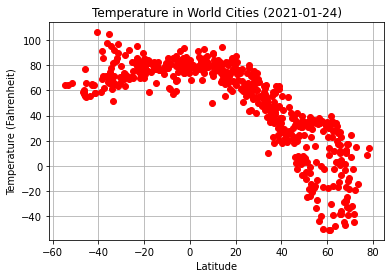

In [11]:
# Converting Date for title of plot
# Note: Dynamic field in chart title - borrowed code from H.Kaur as it is a cool addition to graphs.
timestamp = city_df["date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

# Build a scatter plot for each data type
plt.scatter(city_df["lat"], city_df["temp"], marker="o", color="red", zorder=2)

# Incorporate the other graph properties
# Note: Static title option >>  plt.title("Temperature in World Cities (Jan 2021)")
plt.title(f"Temperature in World Cities ({shortened_timestamp})")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("../output_data/Latitude_temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

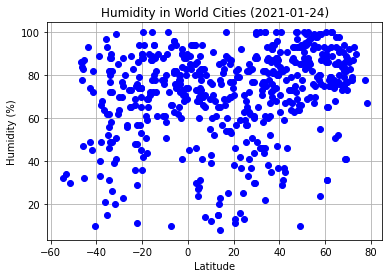

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_df["lat"], city_df["humidity"], marker="o", color="blue", zorder=2)

# Incorporate the other graph properties
plt.title(f"Humidity in World Cities ({shortened_timestamp})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("../output_data/Latitude_humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

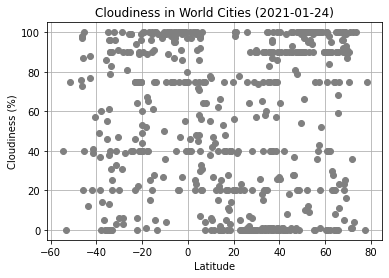

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_df["lat"], city_df["cloudiness"], marker="o", color="grey", zorder=2)

# Incorporate the other graph properties
plt.title(f"Cloudiness in World Cities ({shortened_timestamp})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("../output_data/Latitude_cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

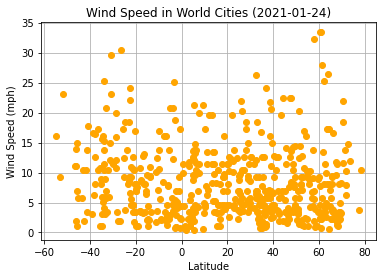

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_df["lat"], city_df["wind_speed"], marker="o", color="orange", zorder=2)

# Incorporate the other graph properties
plt.title(f"Wind Speed in World Cities ({shortened_timestamp})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("../output_data/Latitude_windspeed.png")

# Show plot
plt.show()

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots
# Note: all code must be indented (even print statement); or it will error out.
# Note: def line code may or may not be needed. If used, indent all remaining code.

def lin_reg_plot(x_values,y_values):   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Note: Code below is sample scatter plot; uncomment plt.show() to make sure initial code is working.
# Note: Add the linear regression equation and line to plot & apply some formatting
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=16,color="red")
    print(f"The rvalue is: {rvalue}")
    #plt.show()

In [16]:
# Create dataframes for Northern and Southern Hemisphere
northhem_df = city_df.loc[city_df["lat"] > 0,:]
#northhem_df.head()

southhem_df = city_df.loc[city_df["lat"] < 0,:]
#southhem_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: -0.8598626104808159
None


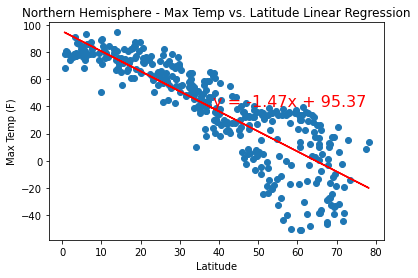

In [17]:
x_values = northhem_df["lat"]
y_values = northhem_df["temp_max"]
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_north_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.3637093425929105
None


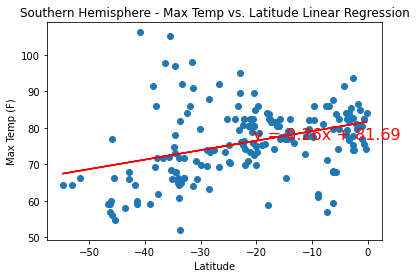

In [18]:
x_values = southhem_df["lat"]
y_values = southhem_df["temp_max"]
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_south_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.32674382928406853
None


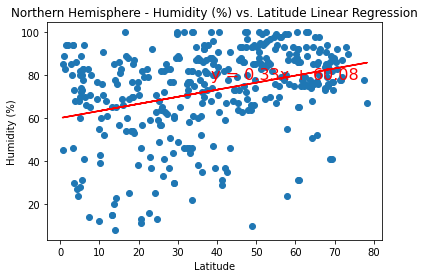

In [19]:
x_values = northhem_df["lat"]
y_values = northhem_df["humidity"]
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_north_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.31085201975305254
None


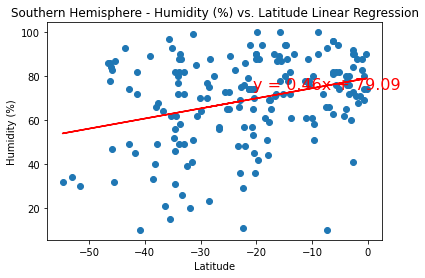

In [20]:
x_values = southhem_df["lat"]
y_values = southhem_df["humidity"]
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_south_humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.241846140391847
None


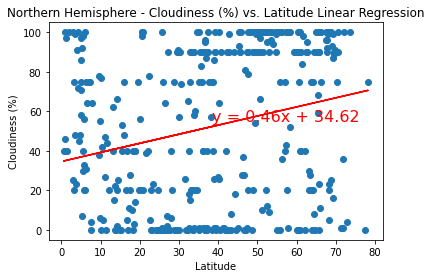

In [21]:
x_values = northhem_df["lat"]
y_values = northhem_df["cloudiness"]
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_north_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.3376981354582728
None


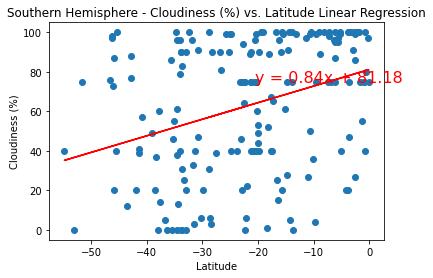

In [22]:
x_values = southhem_df["lat"]
y_values = southhem_df["cloudiness"]
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_south_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: -0.010768078468573377
None


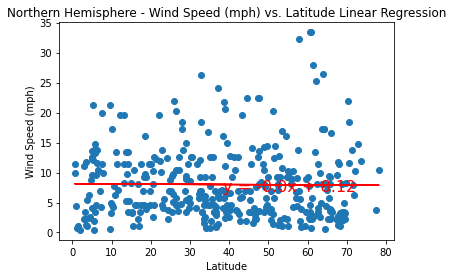

In [23]:
x_values = northhem_df["lat"]
y_values = northhem_df["wind_speed"]
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_north_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: -0.2370269640994553
None


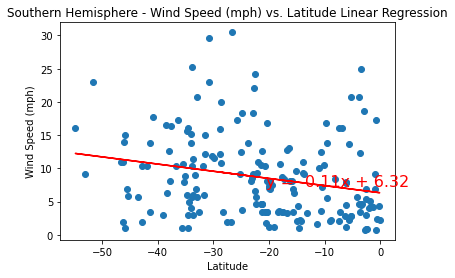

In [24]:
x_values = southhem_df["lat"]
y_values = southhem_df["wind_speed"]
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(lin_reg_plot(x_values,y_values))

# Save the chart
plt.savefig("../output_data/Linreg_south_wind.png")